In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")

path = "C:/Users/aucid/Downloads/train.csv"


df = pd.read_csv (path)

data = df.head ()

data



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.drop (columns= ['PassengerId', 'Name', 'Ticket'], inplace= True)
df.head ()
# OR

# df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace = True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [13]:
types = df.dtypes
uni = df.nunique ()

pd.DataFrame ({"Data_types" : types, "Unique_values" : uni}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Data_types,int64,int64,object,float64,int64,int64,float64,object,object
Unique_values,2,3,2,88,7,7,248,147,3


In [14]:
colms = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',	'Cabin', 'Embarked']

df [colms] = df [colms].astype ("category")
pd.DataFrame ({"Data_types" : df.dtypes}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Data_types,category,category,category,float64,category,category,float64,category,category


In [15]:
check = df.isna ().sum ()
ratio = check / df.shape [0]

pd.DataFrame ({"NULLs" : check, "Ratio" : ratio}).T



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
NULLs,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245


In [16]:
df.dropna (subset= ["Embarked"], inplace= True)

In [17]:
df.drop (columns= ["Cabin"], inplace= True)

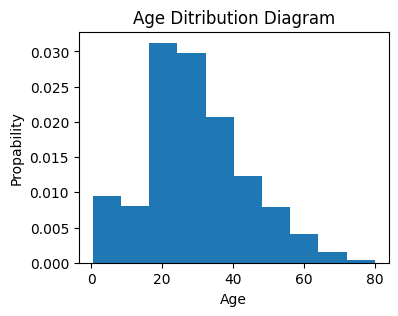

In [ ]:
plt.figure (figsize= (4, 3))
plt.hist (df ["Age"], density= True) 
plt.title ("Age Ditribution Diagram")
plt.xlabel ("Age")
plt.ylabel ("Propability")
plt.show ()

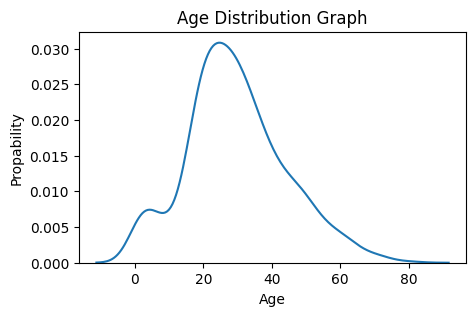

In [19]:
plt.figure (figsize= (5, 3))
sns.kdeplot (df ["Age"])
plt.title ("Age Distribution Graph")
plt.xlabel ("Age")
plt.ylabel ("Propability")
plt.show ()

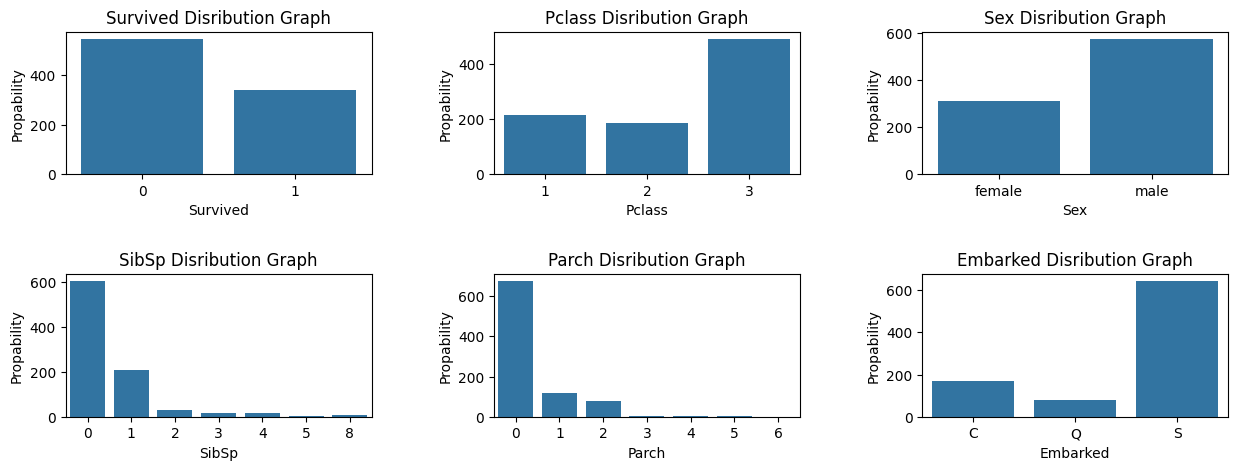

In [ ]:
cat_count = df.select_dtypes ("category").columns
plt.figure (figsize= (15, 5))
for i, col in enumerate (cat_count):
    plt.subplot (2, 3, i+1)
    sns.countplot (x = col, data = df)
    plt.title (f"{col} Disribution Graph")
    plt.xlabel (f"{col}")
    plt.ylabel ("Propability")
plt.subplots_adjust (hspace= .7, wspace = .4)
plt.show ()

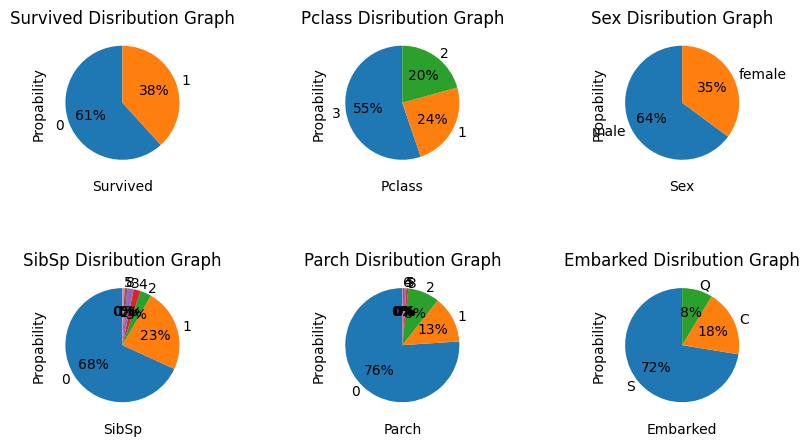

In [24]:
cate_count = df.select_dtypes ("category").columns
plt.figure (figsize= (10, 5))
for i, col in enumerate (cate_count):
    plt.subplot (2, 3, i+1)
    data_values = df [col].value_counts ()
    count = data_values.values
    category = data_values.index
    plt.pie (count, labels = category, startangle = 90, autopct = "%1d%%")
    plt.title (f"{col} Disribution Graph")
    plt.xlabel (f"{col}")
    plt.ylabel ("Propability")

plt.subplots_adjust (hspace = .7, wspace = .3)
plt.show ()

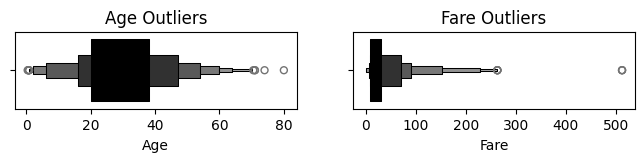

In [32]:
num_col = df.select_dtypes ("number").columns
plt.figure (figsize= (8, 1))
for i, col in enumerate (num_col):
    plt.subplot (1, 2, i+1)
    sns.boxenplot (df [col], orient= "h", color= "black")
    plt.title (f"{col} Outliers")

In [33]:
for col in num_col:
    Q1 = df [col].quantile (.25)
    Q3 = df [col].quantile (.75)
    IQR = Q3 - Q1
    Lower_fence = Q1 - 1.5 * IQR
    Upper_fence = Q3 + 1.5 * IQR
    Lower_Outliers = df [df[col] < Lower_fence] [col].values
    Upper_Outliers = df [df[col] > Upper_fence] [col].values
    df [col].replace (Lower_Outliers, Lower_fence, inplace= True)
    df [col].replace (Upper_Outliers, Upper_fence, inplace= True)

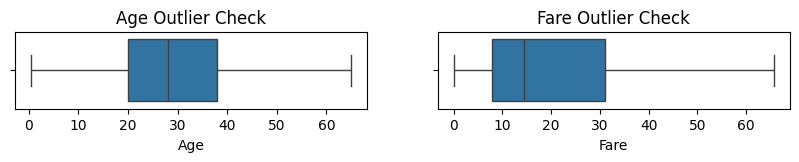

In [34]:
plt.figure (figsize= (10, 1))
for i, col in enumerate (num_col):
    plt.subplot (1, 2, i+1)
    sns.boxplot (df [col], orient= "h")
    plt.title (f"{col} Outlier Check")

In [35]:
df.duplicated ().sum ()

np.int64(120)

In [37]:
df.drop_duplicates (inplace= True)

In [38]:
df.duplicated ().sum ()

np.int64(0)

In [39]:
median = df ["Age"].median ()
df ["Age"].fillna (median, inplace= True)

In [40]:
df ["Age"].isna ().sum ()

np.int64(0)

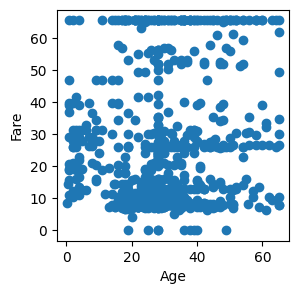

In [43]:
plt.figure (figsize= (3, 3))
plt.scatter (df ["Age"], df ["Fare"])
plt.xlabel ("Age")
plt.ylabel ("Fare")
plt.show ()

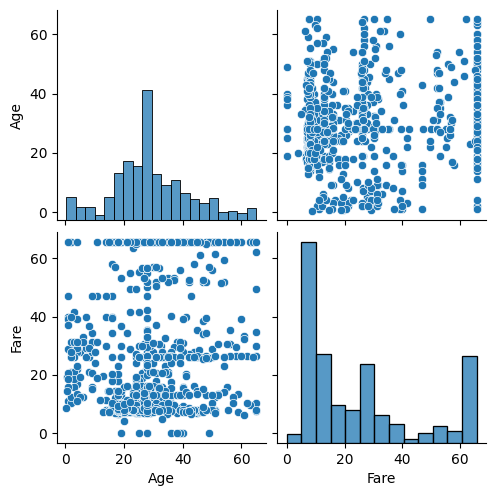

In [46]:
# plt.figure (figsize= (3, 3))
sns.pairplot (df)
# plt.xlabel ("Age")
# plt.ylabel ("Fare")
# plt.show ()

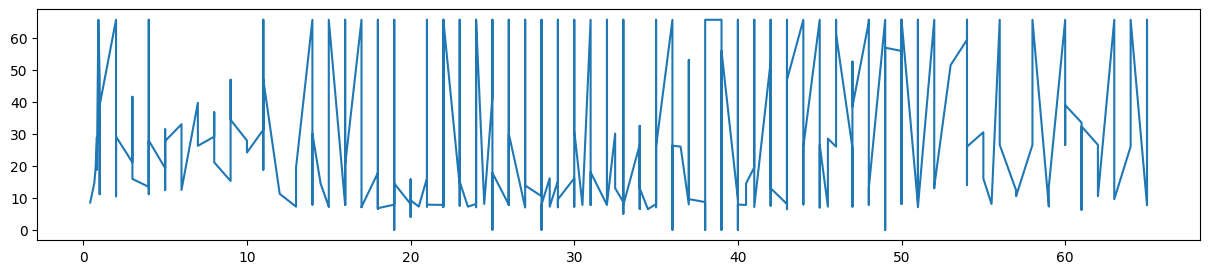

In [49]:
sorted_df = df.sort_values (by= "Age")
plt.figure (figsize= (15, 3))
plt.plot (sorted_df ["Age"], sorted_df ["Fare"])
plt.show ()

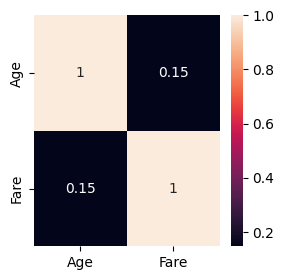

In [56]:
corr = df [num_col].corr ()
plt.figure (figsize= (3, 3))
sns.heatmap (corr, annot= True)
plt.show ()

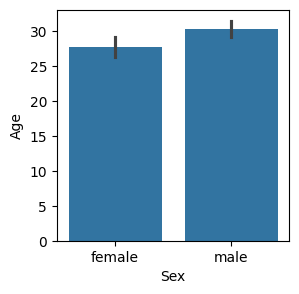

In [57]:
plt.figure (figsize= (3, 3))
sns.barplot (x= "Sex", y= "Age", data= df)
plt.show ()

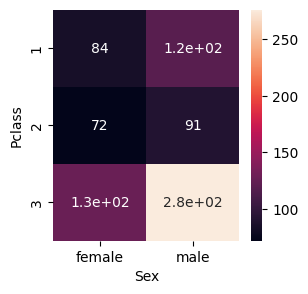

In [59]:
plt.figure (figsize= (3, 3))
agg = df.pivot_table (index= "Pclass", columns= "Sex", values= "SibSp", aggfunc= len)
sns.heatmap (agg, annot= True)
plt.show ()

In [4]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")
path = "C:/Users/aucid/Downloads/train.csv"
df = pd.read_csv (path)
num_col = df.select_dtypes ("number").columns
scaler = MinMaxScaler ()
scaler.fit (df [num_col])
df [num_col] = scaler.transform (df [num_col])

df.head ()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,0.0,1.0,"Braund, Mr. Owen Harris",male,0.271174,0.125,0.0,A/5 21171,0.014151,NaN,S
1,0.001124,1.0,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.125,0.0,PC 17599,0.139136,C85,C
2,0.002247,1.0,1.0,"Heikkinen, Miss. Laina",female,0.321438,0.000,0.0,STON/O2. 3101282,0.015469,NaN,S
3,0.003371,1.0,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.125,0.0,113803,0.103644,C123,S
4,0.004494,0.0,1.0,"Allen, Mr. William Henry",male,0.434531,0.000,0.0,373450,0.015713,NaN,S


In [ ]:
from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")
path = "C:/Users/aucid/Downloads/train.csv"
df = pd.read_csv (path)
str_col = df.select_dtypes ("category").columns
encode = OneHotEncoder (cols= str_col, drop_invariant= True)
df = encode.fit_transform (df)

df.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")
path = "C:/Users/aucid/Downloads/train.csv"
df = pd.read_csv (path)
# Get categorical columns
cat_cols = df.select_dtypes("category").columns.tolist()
n_cols = len(cat_cols)

# Create subplots
fig = make_subplots(
    rows=2, 
    cols=3,
    subplot_titles=[f"{col} Distribution" for col in cat_cols],
    vertical_spacing=0.2
)

# Add each plot
for i, col in enumerate(cat_cols):
    row = (i // 3) + 1
    col_num = (i % 3) + 1
    
    # Create bar chart with Plotly Express
    bar_fig = px.bar(
        df[col].value_counts().reset_index(),
        x='index',
        y=col,
        color_discrete_sequence=[px.colors.qualitative.Set2[i]]
    )
    
    # Add to subplot
    for trace in bar_fig.data:
        fig.add_trace(trace, row=row, col=col_num)
    
    # Update axes
    fig.update_xaxes(title_text=col, row=row, col=col_num, tickangle=45)
    fig.update_yaxes(title_text="Count", row=row, col=col_num)

# Update layout
fig.update_layout(
    height=800,
    showlegend=False,
    title_text="Interactive Categorical Distributions",
    title_x=0.5
)

fig.show()